In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os

os.chdir("/content/")

In [ ]:
import pandas as pd
import numpy as np
from os import listdir,mkdir
from os.path import isfile, join,exists
import json

In [ ]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=1
drive_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data'
local_path='/Users/vikashmediboina/Documents/Exersises'
angle_rep_wise_data_path='angle_rep_wise_data_40_vedioes_each_set.xlsx'
postion_rep_wise_data_path='postion_rep_wise_data_40_vedioes_each_set.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='angle_data_frame_size_100.xlsx'
test_postion_rep_wise_data_path='test_postion_rep_wise_data.xlsx'
test_angle_rep_wise_data_path='test_angle_rep_wise_data.xlsx'
test_postion_data_path='test_postion_data_all.xlsx'
test_angle_data_path='test_angle_data_path.xlsx'
postion_data_path_for_1='postion_data_frame_size_1_with_vedios_1.xlsx'
angle_data_path_for_1='angle_data_frame_size_1_with_vedios_1.xlsx'

In [ ]:
pd_position_data=pd.read_excel(join(drive_path,postion_data_path))
pd_angle_data=pd.read_excel(join(drive_path,angle_data_path))

In [ ]:
pd_position_data_for_1_vedioe=pd.read_excel(join(drive_path,postion_data_path_for_1))
pd_angle_data_1_vedioe=pd.read_excel(join(drive_path,angle_data_path_for_1))

In [ ]:
pd_angle_data_1_vedioe.head

<bound method NDFrame.head of       Unnamed: 0  angle_right_hand_elbow  angle_left_hand_elbow  \
0              0                0.599961              -6.025943   
1              1                4.016549              -8.966043   
2              2                2.270713              -8.225329   
3              3               12.045749              -9.481705   
4              4               20.944062              -3.472699   
...          ...                     ...                    ...   
2729        2729               29.251378              -0.613786   
2730        2730               24.852673              -4.143793   
2731        2731               36.947430              -4.143793   
2732        2732               36.947430              -4.143793   
2733        2733               36.947430              -3.957162   

      angle_right_hand_shoulder  angle_left_hand_shoulder  angle_right_hip  \
0                   -103.665916                 49.843554         0.532129   
1        

In [ ]:
def aggregator_position_var(label): 
  return pd_position_data.groupby([label],axis=0).std()
def aggregator_angle_var(label): 
  return pd_angle_data.groupby([label],axis=0).std()
aggregator_angle_var('vedio_id')#aggregator_var('label')#aggregator_var('rep_id')

,Unnamed: 0,left_hip_X,left_hip_Y,left_knee_X,left_knee_Y,left_ankle_X,left_ankle_Y,right_hip_X,right_hip_Y,right_knee_X,...,left_elbow_Y,left_wrist_X,left_wrist_Y,right_shoulder_X,right_shoulder_Y,right_elbow_X,right_elbow_Y,right_wrist_X,right_wrist_Y,rep_id
vedio_id,,,,,,,,,,,,,,,,,,,,,
1,57.879185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.342170,0.000000,0.070161,...,11.726167,6.073983,21.579566,0.883809,0.901799,4.598255,12.274130,8.872471,23.195633,1.192934
2,144.481833,0.283243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.242302,2.632097,18.580849,0.414994,1.017336,1.442975,9.607241,3.103021,18.851220,2.160764
3,144.481833,0.175959,0.000000,0.248348,0.000000,0.000000,0.000000,0.336389,0.440032,0.362851,...,12.880162,7.944918,25.448127,1.687462,1.320604,3.227619,12.071999,5.660569,23.498120,2.538808
4,144.481833,0.399786,0.444959,0.000000,0.000000,0.000000,0.480852,0.366468,0.465378,0.431359,...,18.444133,11.428415,37.979659,2.237992,2.372274,4.078579,16.481699,7.213762,32.168534,1.893937
5,57.879185,0.461385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293389,0.000000,...,8.527381,3.700139,17.030098,0.709156,1.236586,2.921457,9.425868,6.256583,18.519687,0.901018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,57.879185,0.483080,0.474639,0.884919,1.514106,2.806081,5.552941,0.000000,0.442258,0.763745,...,3.091097,0.573093,5.412354,0.466737,2.367011,0.459867,6.081026,0.958788,10.089874,0.813069
997,57.879185,0.382842,0.493045,2.389915,1.976378,4.383503,6.061934,0.372025,0.318175,2.792466,...,4.196022,1.213679,6.992472,0.683011,3.222586,1.899011,8.314456,2.350007,14.587200,0.862959
998,144.481833,0.000000,0.440698,1.065670,1.504841,3.142122,5.959519,0.000000,0.467401,1.116230,...,3.522325,0.817161,6.613935,0.288893,2.220247,0.692182,5.396371,1.745194,8.962718,2.307437


In [ ]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# POSITION

##Heat Map

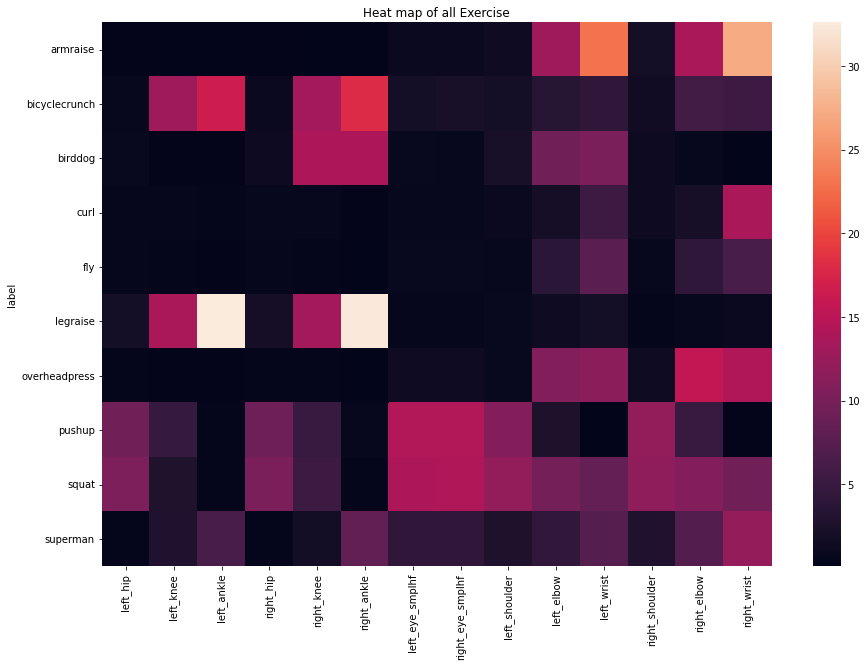

In [ ]:
plt.figure(figsize=(15,10))

ax = plt.axes()
keys=['left_hip','left_knee','left_ankle','right_hip','right_knee','right_ankle','left_eye_smplhf','right_eye_smplhf','left_shoulder','left_elbow','left_wrist','right_shoulder','right_elbow','right_wrist']


sinsoidal_data={}
alldata=[]
for ele in range(0,pd_position_data.shape[0]):
  sinsoidal_data={}
  for key in keys:
    # print(i)
    if(not(key in sinsoidal_data)):
      sinsoidal_data[key]=0
    sinsoidal_data[key]=pd_position_data[key+'_X'][ele]-pd_position_data[key+'_Y'][ele]
  if not('label' in sinsoidal_data):
      sinsoidal_data['label']=pd_position_data['label'][ele]
  alldata.append(sinsoidal_data)
# print(len(alldata))
df_data = pd.DataFrame.from_dict(alldata)
# df_group_dat=df_data.groupby('label')



sns.heatmap(df_data.groupby("label").std())
ax.set_title('Heat map of all Exercise')
plt.show()

##Sinosudal Representation

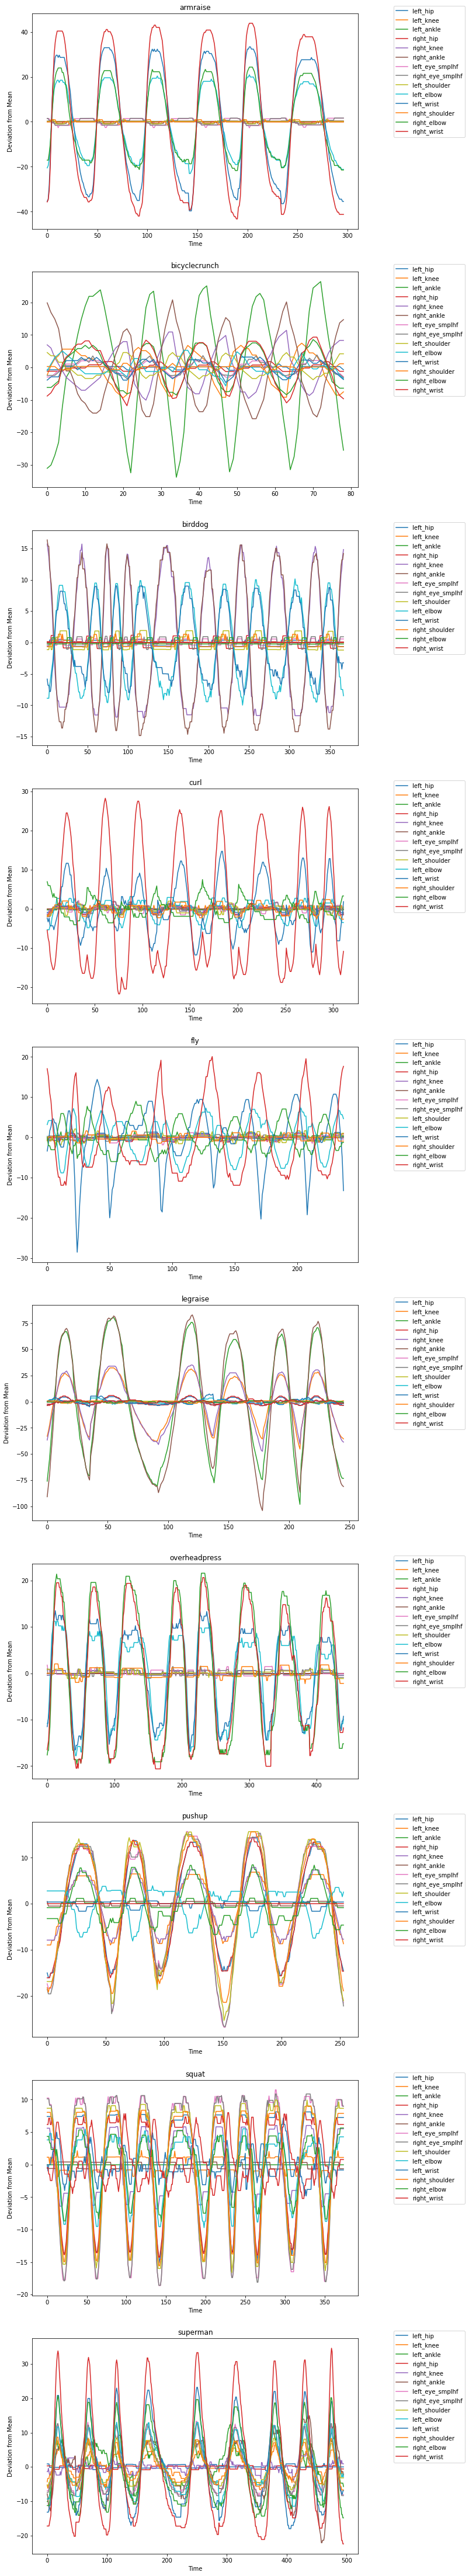

In [25]:
keys=['left_hip','left_knee','left_ankle','right_hip','right_knee','right_ankle','left_eye_smplhf','right_eye_smplhf','left_shoulder','left_elbow','left_wrist','right_shoulder','right_elbow','right_wrist']


sinsoidal_data={}
alldata=[]
for ele in range(0,pd_position_data_for_1_vedioe.shape[0]):
  sinsoidal_data={}
  for key in keys:
    # print(i)
    if(not(key in sinsoidal_data)):
      sinsoidal_data[key]=0
    sinsoidal_data[key]=pd_position_data_for_1_vedioe[key+'_X'][ele]-pd_position_data_for_1_vedioe[key+'_Y'][ele]
  if not('label' in sinsoidal_data):
      sinsoidal_data['label']=pd_position_data_for_1_vedioe['label'][ele]
  alldata.append(sinsoidal_data)
# print(len(alldata))
df_data = pd.DataFrame.from_dict(alldata)
df_group_dat=df_data.groupby('label')



fig, axs = plt.subplots(10, 1,figsize=(10, 80))

index=-1

# for name, group in pd_position_data_for_1_vedioe.groupby('label'):
    
#     index+=1
#     for key in pd_position_data_for_1_vedioe.drop(['vedio_id','rep_id','Unnamed: 0'],axis=1).keys():
#       if(key in ['left_shoulder_Y','left_elbow_Y','left_wrist_Y','right_shoulder_Y','right_elbow_Y','right_wrist_Y']):
#         x=np.arange(start=0, stop=len(group[key]), step=1)
#         x1=np.arange(start=0, stop=len(group[key]), step=1)
#         axs[index].plot(x1, group[key] ,label=key)
#         axs[index].legend(bbox_to_anchor=(1.1, 1.05))
#         axs[index].set_xlabel("Time")
#         axs[index].set_ylabel("Deviation from Mean")
#         axs[index].set_title(name)





for name, group in df_data.groupby('label'):
    
    index+=1
    for key in keys:
      # if(key in ['left_shoulder_Y','left_elbow_Y','left_wrist_Y','right_shoulder_Y','right_elbow_Y','right_wrist_Y']):
        x=np.arange(start=0, stop=len(group[key]), step=1)
        x1=np.arange(start=0, stop=len(group[key]), step=1)
        axs[index].plot(x1, group[key] ,label=key)
        axs[index].legend(bbox_to_anchor=(1.1, 1.05))
        axs[index].set_xlabel("Time")
        axs[index].set_ylabel("Deviation from Mean")
        axs[index].set_title(name)




#     axs[0].plot(x, birddog[shapes[index]]['x'][0], color =color[index],label=(shapes[index]+"  birddog"))
# axs[1].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[0].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[1].set_title("Rep-1 for Bicyclecrunch Exercise")
# axs[0].set_title("Rep-1 for Birddog Exercise")
plt.show()


##PAIR PLOT

In [ ]:
droped_data=pd_position_data_for_1_vedioe.drop(["rep_id","vedio_id","Unnamed: 0"], axis=1)

g = sns.pairplot(droped_data, hue='label');
plt.show()

KeyboardInterrupt: ignored

In [ ]:
droped_data=pd_angle_data_1_vedioe.drop(["rep_id","vedio_id","Unnamed: 0"], axis=1)

g = sns.pairplot(droped_data, hue='label');
plt.show()

# ANGLE

# HEATMAP

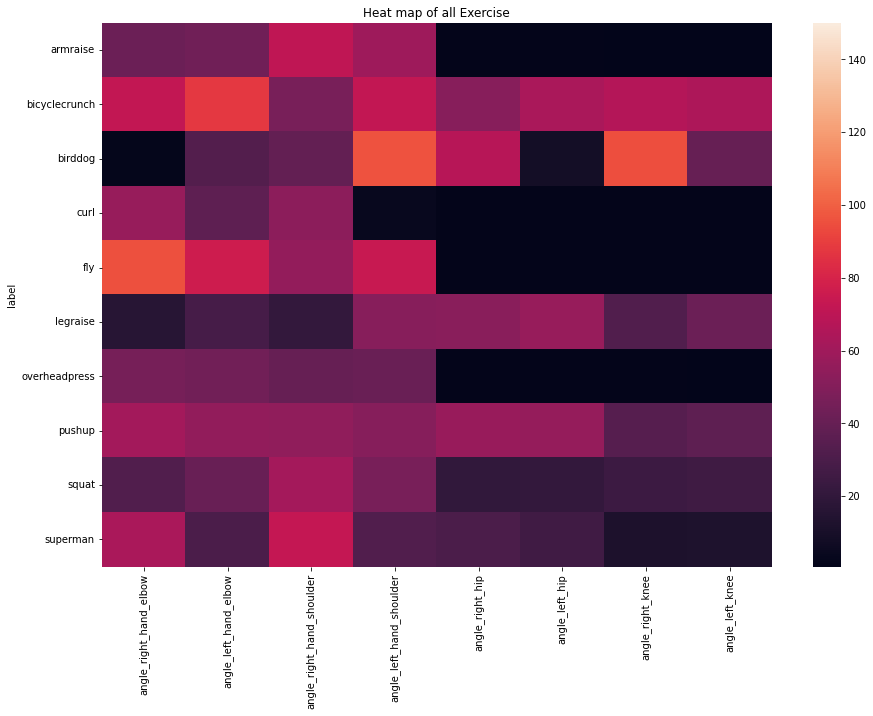

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.axes()
sns.heatmap(pd_angle_data.drop(["rep_id","vedio_id","Unnamed: 0"], axis=1).groupby("label").std(),vmax=150)
ax.set_title('Heat map of all Exercise')
plt.show()

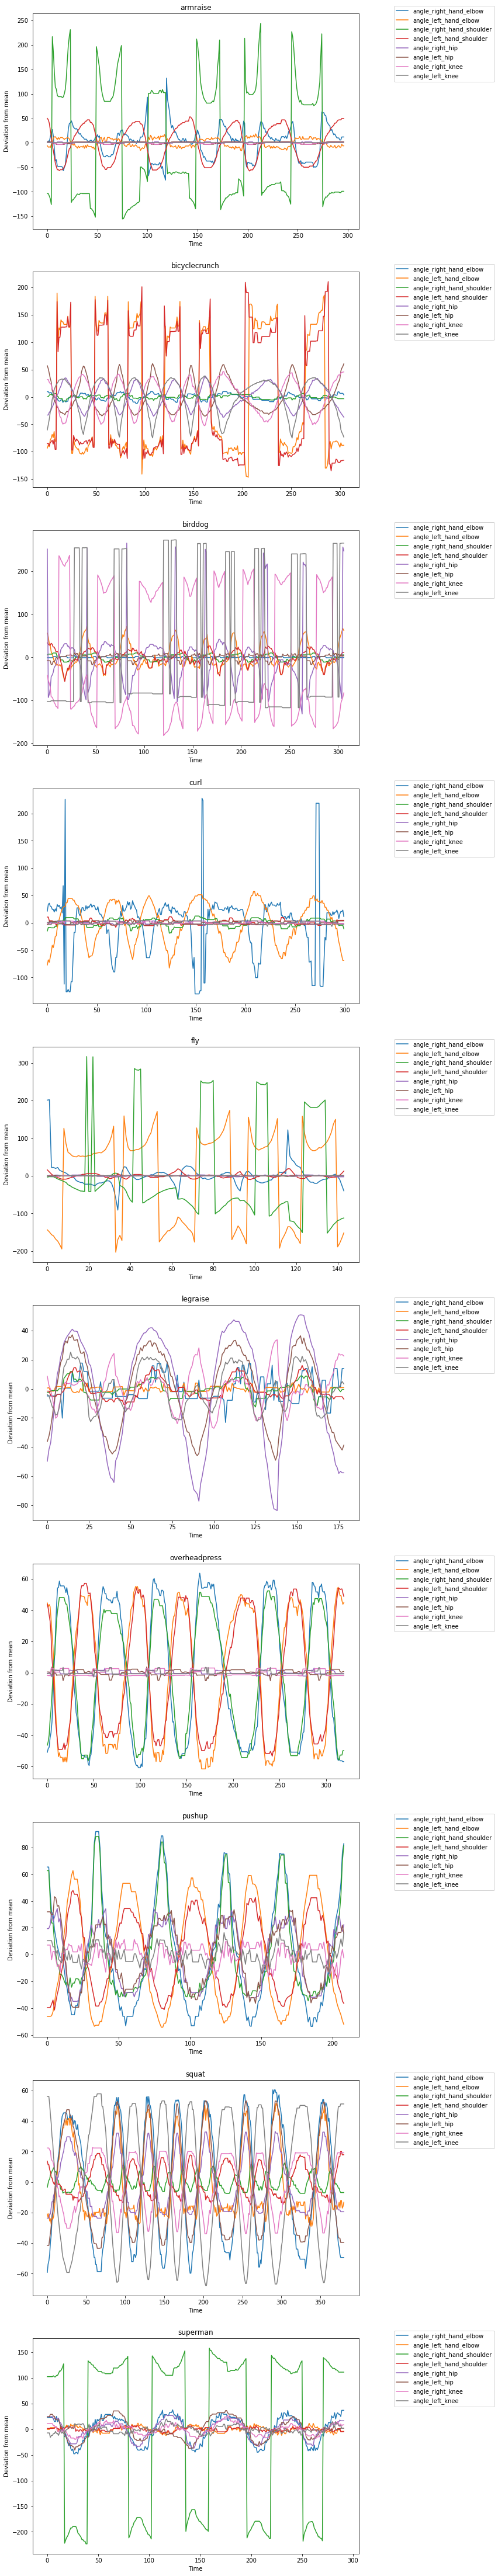

In [24]:
keys=['angle_right_hand_elbow','angle_left_hand_elbow','angle_right_hand_shoulder','angle_left_hand_shoulder','angle_right_hip','angle_left_hip','angle_right_knee','angle_left_knee']
sinsoidal_data={}
alldata=[]
for ele in range(0,pd_angle_data_1_vedioe.shape[0]):
  sinsoidal_data={}
  for key in keys:
    # print(i)
    if(not(key in sinsoidal_data)):
      sinsoidal_data[key]=0
    sinsoidal_data[key]=pd_angle_data_1_vedioe[key][ele]
  if not('label' in sinsoidal_data):
      sinsoidal_data['label']=pd_angle_data_1_vedioe['label'][ele]
  alldata.append(sinsoidal_data)
# print(len(alldata))
df_data = pd.DataFrame.from_dict(alldata)
df_group_dat=df_data.groupby('label')



fig, axs = plt.subplots(10, 1,figsize=(10, 80))

index=-1

for name, group in df_data.groupby('label'):
    
    index+=1
    for key in keys:
      x=np.arange(start=0, stop=len(group[key]), step=1)
      x1=np.arange(start=0, stop=len(group[key]), step=1)

      axs[index].plot(x1, group[key] ,label=key)
      axs[index].legend(bbox_to_anchor=(1.1, 1.05))
      axs[index].set_ylabel("Deviation from mean")
      axs[index].set_xlabel("Time")
      axs[index].set_title(name)
#     axs[0].plot(x, birddog[shapes[index]]['x'][0], color =color[index],label=(shapes[index]+"  birddog"))
# axs[1].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[0].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[1].set_title("Rep-1 for Bicyclecrunch Exercise")
# axs[0].set_title("Rep-1 for Birddog Exercise")
plt.show()
